Elit Jasmine Dogu (ejd5mm)       
DS 5001    
5 May 2021    
*Third year, Undergraduate Student*     



# What This File Contains
- Extracting Length of Sentence 
- Sentence Length Plots
    - Uncleaned Data
    - Cleaned Data
- Converting Lines to Tokens
    - Normalizing Tokens
- Convering Lines to Tokens Using NLTK
    - Normalizing Tokens
- Creating Vocabulary Table 
    - Looking at Word Frequency in Vocabulary Table 
- Book Information
    - Front and Back End 
    - Chapters of the Novel
- Grouping the Dataframes by Different OHCO Levels
    - Chapter
    - Paragraph 
    - Sentence
    - Token
- Unigram Model 
    - Predicting Sentences Using Unigram 
- N-Gram Model
    - Generate Three Models
    - Compute Joint Probabilities 
    - Compute Conditional Probabilities 
- Predicting Sentences
- Exploring Pairs 
- Generating Text
- Compute Entropy 

Homework 2 and 3 

## Imports

In [1]:
#imports 

import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import matplotlib.pyplot as pla

In [2]:
sns.set()
#updates setting so graphics look better

## Data Set Up

In [3]:
#creating subdirectories
data_in = './data_in'
data_out = './data_out/file3'

In [4]:
#reading in the txt file
epub_file = "The-Great-Gatsby.txt" # Source file- Project Guttenburg 

In [5]:
epub = open("{}/{}".format(data_in, epub_file), 'r', encoding='utf-8-sig').readlines() #reads each line 
epub_read = open("{}/{}".format(data_in, epub_file), 'r', encoding='utf-8-sig').read() #reads each line 

#the initial source of data is considered the F0 format -- this is the "The-Great-Gatsby.txt" file that we are reading in
df = pd.DataFrame(epub, columns=['line_str']) #dataframe constructor, and giving the column a name
df.index.name = 'line_num' #making line_num index 
df.line_str = df.line_str.str.strip() #gets rid of precent/following white space
df_no_cleaning = df.copy() #creating a copy for later

In [6]:
df.sample(10) #looking to see if df is correctly setup, need to get rid of empty lines and rows with dashes 

,line_str
line_num,
4734,counter. That’s one of his little stunts. I pi...
4501,“He was probably bumming his way home. He told...
4397,the traffic delayed them he slowed up until th...
3616,“Perhaps you know that lady.” Gatsby indicated...
2894,occasional thin drops swam like dew. Gatsby lo...
3576,
818,
2626,She began to cry—she cried and cried. I rushed...
4887,


In [7]:
df['line_str'].replace('', np.nan, inplace=True) #replacing empty rows with NA's
df= df.dropna(subset=['line_str']) #dropping rows with NA's

In [8]:
#extracts the title of the book based on visual cues in the text
title_of_novel = df.loc[0].line_str.replace('The Project Gutenberg EBook of ', '')
title_of_novel #gives the name of the novel 

'The Project Gutenberg eBook of The Great Gatsby, by F. Scott Fitzgerald'

In [9]:
df.shape[0] #number of lines in the novel

5053

The novel has 5053 lines with the nonessential rows taken out. Currently, the dataframe only contains text that is relevant to the novel. However, it has pre and post matter, which in later steps will also be cleaned.

## Extracting a Simple Feature
Here, we will be extracting the length of each sentence as our first feature

In [10]:
df2 = df.copy() #create a copy to avoid messing up original df
df2['len'] = df2.line_str.str.len() #add column len, which is the length of each line_str
df2.sample(10)

,line_str,len
line_num,,
2709,“Why didn’t he ask you to arrange a meeting?”,45
1037,was converted into impressive hauteur. Her lau...,70
3835,"all slowly, he could find out what that thing ...",51
5699,"from view. The police, on the strength of what...",68
2022,"“No, you’re not.”",17
2245,“That’s the one from Montenegro.”,33
59,In my younger and more vulnerable years my fat...,69
805,The fact that he had one was insisted upon whe...,69
4123,a long time ago.,16


In [11]:
df2.len.describe() #looking at statistics of the df2

count    5053.000000
mean       55.908569
std        19.054531
min         1.000000
25%        49.000000
50%        66.000000
75%        68.000000
max        74.000000
Name: len, dtype: float64

As we can see above, the number of non-NA observations is 5053, which we also obtained earlier by looking at the length of our dataframe. Similarly, the mean number for the len column, which describes the length of the line, is 55.908569. This means that the average line in the novel is about 56 words long. This, compared to the minimum of 0 which results from empty lines and to the maximum of 74 words makes great sense. The dataframe df2 is a copy of df with a new feature added- the length of the line. This still belongs under the F1 format.

## Sentence Length Plots
Looking at the length of sentences for both the cleaned and the uncleaned dataframe 

### Uncleaned Data

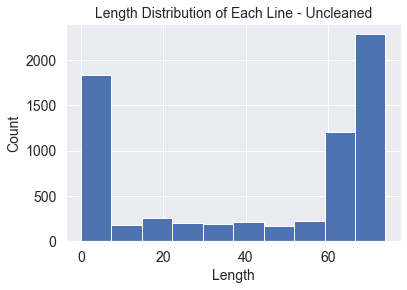

In [12]:
df_no_cleaning['len'] = df_no_cleaning.line_str.str.len()
df_no_cleaning.len.hist();
plt.title('Length Distribution of Each Line - Uncleaned',fontsize=14)
plt.xlabel('Length',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.tick_params(axis='both',labelsize=14)
plt.savefig('./data_out/file3/length_of_line_uncleaned.png')
plt.show()


Here, we are analyzing the length distribution of the data that is not cleaned. This will vary slightly from what we noticed with the cleaned dataset due to the presence of empty lines, which were removed in the cleaned dataframe. Looking at the histogram, we see the highest counts of length of sentence is around 0 and around 66.

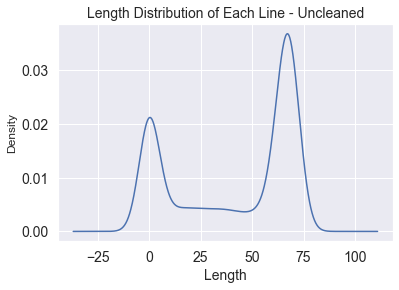

In [13]:
df_no_cleaning.len.plot.kde();
plt.title('Length Distribution of Each Line - Uncleaned',fontsize=14)
plt.xlabel('Length', fontsize=14)
plt.tick_params(axis='both',labelsize=14)
plt.savefig('./data_out/file3/length_of_line_uncleaned_line.png')
plt.show()

Here, we are looking at the 'Length Distribution of Each Line' before the data cleaning was attempted. We can see here, we have a bimodal distribution with the two peaks at 0 and around 66. Having a bimodal distribution means that content is divided into paragraphs using lines and empty lines (length of 0). In other words, it represents that there are a lot of empty or short lines. 

Text in the western tradition is broken into paragraphs. Usually, within text, there will be content and empty lines. The content represents the heart of the novel as it is where the narrative lays. The empty lines, on the other hand, perform structural work; they help format the novel meaningfully and strategically. This difference between form and content shows us the nature of the artifact we are looking at. 

### Cleaned Data

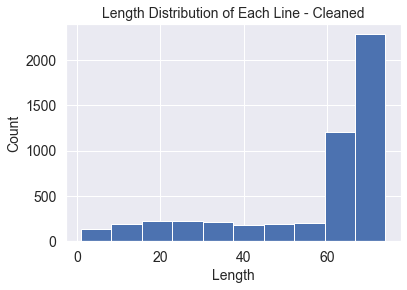

In [14]:
df2.len.hist();
plt.title('Length Distribution of Each Line - Cleaned',fontsize=14)
plt.xlabel('Length',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.tick_params(axis='both',labelsize=14)
plt.savefig('./data_out/file3/length_of_line_cleaned.png')
plt.show()

Here, we are analyzing the cleaned dataframe, which has gotten rid of most 0's and the unnecessary dashes. This aims to look at just the content of the novel rather than the structural and content based material. Here, we can see that the most common length distribution of each line lies around 60+ words.

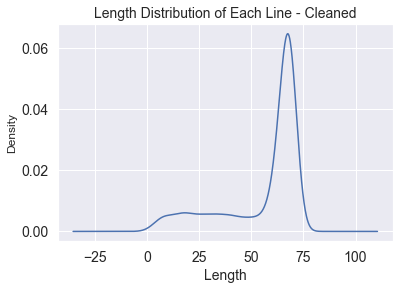

In [15]:
df2.len.plot.kde();
plt.title('Length Distribution of Each Line - Cleaned',fontsize=14)
plt.xlabel('Length', fontsize=14)
plt.tick_params(axis='both',labelsize=14)
plt.savefig('./data_out/file3/length_of_line_cleaned_line.png')
plt.show()

Looking at the plot above, we see that it is unimodal. This makes sense because looking at the cleaned dataframe, we do not have any empty spaces as we did with the uncleaned dataframe. The uncleaned dataframe, thereforee, also contained a high count of 0 length lines, which signified empty spaces used for structural work. Therefore, since the structure of the novel was modified, we would expect to not see a bimodal distribution in this scenario. Here, we notice that the highest density for the length of each line lies near 66-70 words. 

Lines can be thought of as arbitrary elements that have to do with the formatting requirements of the Project of Guttenburg. We now move onto looking at tokens, paragraphs, and chapters as these are more useful to analyze for our purposes.

## Converting Lines into Tokens

In [16]:
#split line, convert to columns with tokens, stack columns, convert to frame, rename everything
#using df2 which has the length of each line 
TOKEN = df2.line_str.str.split(expand=True).fillna('').stack().to_frame() #takes the column line_str, and splits by empty spaces. Take wide data representation into thin data representation 
TOKEN.index.names = ['line_num','token_num']
TOKEN.columns = ['token_str']

In [17]:
TOKEN.head(10)

token_str
line_num token_num           
0        0                The
         1            Project
         2          Gutenberg
         3              eBook
         4                 of
         5                The
         6              Great
         7            Gatsby,
         8                 by
         9                 F.

In [18]:
#counting the number of empty strings in the token table
TOKEN[TOKEN.token_str == ''].count()[0] # Number of empty lines


44746

As seen above, there are 44,746 empty strings in the token table. Let's clean this up.

In [19]:
#removing space
#preserved spaces first, can do it with removing spaces too as shown below
TOKEN = df2.line_str.str.split(expand=True).stack().to_frame() #  No fillna('')
TOKEN.index.names = ['line_num','token_num']
TOKEN.columns = ['token_str']
TOKEN.head()

token_str
line_num token_num           
0        0                The
         1            Project
         2          Gutenberg
         3              eBook
         4                 of

In [20]:
TOKEN[TOKEN.token_str == ''].count()[0]

0

As seen above, we removed the .fillna() line to remove the spaces. As such, the empty strings in the token table is now 0. The dataframe TOKEN represents our most basic version of a token table. We will normalize to a Term String table in the next steps. The Term String feature added on to the Token table is still a part of the F2 Text Data level.

### Cleaning the Token Table
Normalizing token_str into term_str

In [21]:
TOKEN['term_str'] = TOKEN.token_str.replace('\W+', '', regex=True).str.lower()
#create a term_str
#term is a class where token is an instance

The token table now also contains the normalized version of the token_str called the term_str.

In [22]:
TOKEN.to_csv('{}/Great-Gatsby-TOKEN-NORMALIZED.csv'.format(data_out))

## Creating a Token Table Using NLTK

In [23]:
import nltk
df2 = df.copy()
df2 = df2.reset_index()

NLTK_TOKEN = pd.DataFrame(df2.line_str.map(nltk.word_tokenize).tolist(), index=df2.line_num).stack()
NLTK_TOKEN = pd.DataFrame(NLTK_TOKEN)
NLTK_TOKEN.index.names = ['line_num','token_num']
NLTK_TOKEN.columns = ['token_str']
NLTK_TOKEN

token_str
line_num token_num           
0        0                The
         1            Project
         2          Gutenberg
         3              eBook
         4                 of
...                       ...
6772     6               hear
         7              about
         8                new
         9             eBooks
         10                 .

[64568 rows x 1 columns]

Above, we are creating the same TOKEN table that we created before. However, this time instead of creating each token using a regex, we will be using the package NLTK to create each token. This package is extremely powerful and can be useful for tokenizing certain words that would not be captured by the regex. While not always, it can perform better than the regex used to split each token. For the purposes of this project, I have kept both this TOKEN table as well as the one created right before to show the different ways in which a basic TOKEN table can be created. 

In [24]:
NLTK_TOKEN[NLTK_TOKEN.token_str == ''].count()[0]

0

### Cleaning the Token Table
Normalizing token_str into term_str as we did before.

In [25]:
NLTK_TOKEN['term_str'] = NLTK_TOKEN.token_str.replace('\W+', '', regex=True).str.lower()
#create a term_str
#term is a class where token is an instance
NLTK_TOKEN

token_str   term_str
line_num token_num                      
0        0                The        the
         1            Project    project
         2          Gutenberg  gutenberg
         3              eBook      ebook
         4                 of         of
...                       ...        ...
6772     6               hear       hear
         7              about      about
         8                new        new
         9             eBooks     ebooks
         10                 .           

[64568 rows x 2 columns]

Here, we are once again normalizing the table so that it contains a `term_str` column. This contains the same information as `token_str` however is normalized in the sence that capitalization is avoided, etc. 

In [26]:
NLTK_TOKEN.to_csv('{}/Great-Gatsby-TOKEN-NLTK-NORMALIZED.csv'.format(data_out))

## Creating Vocabulary Table 
A `vocabulary table` is a table of terms (As opposed to tokens, which are term _instances_.). A vocabulary table is still a part of the F2 Text Data format.


In [27]:
VOCAB = pd.DataFrame(TOKEN.term_str.value_counts()) #.value_counts() takes every unique value and counts how many times it exists, returns a series
VOCAB.columns = ['n'] #name the new column that emerges n 
VOCAB.index.name = 'term_str' #name index term_str
VOCAB.sort_index()

,n
term_str,
,113
1,2
12,1
1500,1
158th,1
...,...
youth,4
youve,13
youwhy,1


## Looking at Word Frequency in Vocab Table

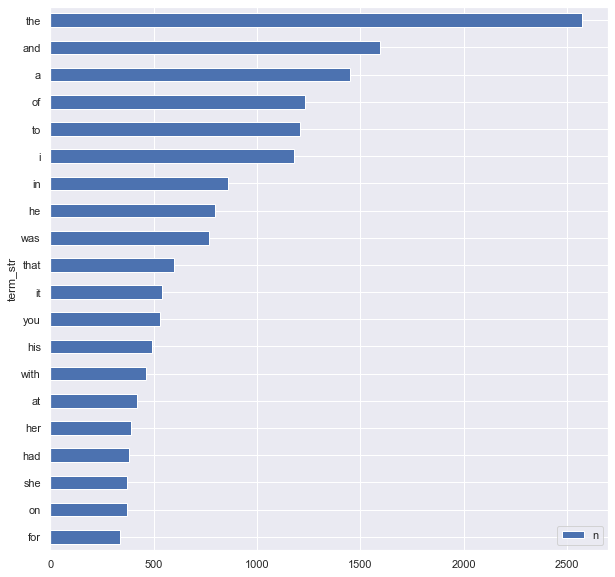

In [28]:
#look at most frequent words
VOCAB.sort_values('n').tail(20).plot.barh(figsize=(10,10));

In [29]:
VOCAB.to_csv('{}/Great-Gatsby-VOCAB.csv'.format(data_out))

Looking at the plot above, we can see the most frequent words that are used in our novel. We notice that for a lot of the most frequent words, they are what are known as 'stop' words. This will be important in the future as we continue with our analysis.

## Book Information
This will be Used to Subset the Dataset

### Remove Gutenberg's Front and Back Matter
Looking at the front and back matter


In [30]:
#START AND END 
#removing front and back matter 
front = df.line_str.str.match(r"Thomas Parke d’Invilliers") #the novel starts after this line
back = df.line_str.str.match(r"\*\*\*\s*END OF THE PROJECT") #novel ends at this line 

front_index = df.loc[front].index[0]
back_index = df.loc[back].index[0]

df = df.loc[front_index + 1 : back_index - 2]

In [31]:
print(front_index)
print(back_index)

54
6427


The novel begins on line 54 of the file, and the novel ends at line 6,427 of the file. However, it is important to note there is text before and after these lines of the novel. The text before and after is irrelevant to our analysis as it is not the novel itself rather text about Project Gutenberg. As such, the  cells above get rid of the front and back matter, isolating the dataframe to the lines that are relevant to the project. This information (the start and end of the novel) was also used in File2.ipynb. 

In [32]:
#define dataframe using the location excessor here
df = df.loc[front_index + 1 : back_index - 2]

## Chapters in the Novel

In [33]:
#finding all chapter headers
#returns a boolean result/indexer 
roman = '[IVXLCM]+'
chap_lines = df.line_str.str.match(r"^\s*{}\s*$".format(roman), case=False)
df.loc[chap_lines]

,line_str
line_num,
57,I
774,II
1321,III
2051,IV
2756,V
3329,VI
3866,VII
5206,VIII
5757,IX


The chart above shows the line number for where each chapter begins. The column on the right displays the chapters in the novel. We will convert the roman numeral chapters to integer values and assign every line in the novel its corresponding chapter number. As the program correctly deciphers, there are indeed 9 chapters in the novel.

In [34]:
chap_nums = [i+1 for i in range(df.loc[chap_lines].shape[0])]
df.loc[chap_lines, 'chap_num'] = chap_nums
df.chap_num = df.chap_num.ffill() #forward fill the missing chapters
df

,line_str,chap_num
line_num,,
57,I,1.0
59,In my younger and more vulnerable years my fat...,1.0
60,that I’ve been turning over in my mind ever si...,1.0
62,"“Whenever you feel like criticizing anyone,” h...",1.0
63,remember that all the people in this world hav...,1.0
...,...,...
6420,"year recedes before us. It eluded us then, but...",9.0
6421,"matter—tomorrow we will run faster, stretch ou...",9.0
6422,one fine morning—,9.0


In [35]:
#get rid of every row for which chapter number is NA, and get rid of every row with chapter number titles, then convert to integers
df = df.loc[~df.chap_num.isna()] # Remove everything before Chapter 1
df = df.loc[~chap_lines] # Remove chapter heading lines
df.chap_num = df.chap_num.astype('int') # Convert chap_num from float to int

df #df now has line_num, line_str, chap_num 
#we originally had line_num, line_str for df --> added chap_num

,line_str,chap_num
line_num,,
59,In my younger and more vulnerable years my fat...,1
60,that I’ve been turning over in my mind ever si...,1
62,"“Whenever you feel like criticizing anyone,” h...",1
63,remember that all the people in this world hav...,1
64,that you’ve had.”,1
...,...,...
6420,"year recedes before us. It eluded us then, but...",9
6421,"matter—tomorrow we will run faster, stretch ou...",9
6422,one fine morning—,9


This table now tells us the line of every number, what the line contains (as a string), and what chapter it belongs to.

In [36]:
df.to_csv('{}/Great-Gatsby-LINE-CHAPTER.csv'.format(data_out), index=True)

## Grouping the Dataframe by Different OHCO Levels


In [37]:
OHCO = ['chap_num', 'para_num', 'sent_num', 'token_num'] #defining an OHCO structure

### Group Lines by Chapter


In [38]:
#group by chapter number, take the line string, apply this function

dfc = df.groupby(OHCO[:1]).line_str.apply(lambda x: '\n'.join(x)).to_frame() # Make big string
#dont have the new lines that preceed the follow

#new dataframe for chapters
dfc['line_str'] = dfc.line_str.str.strip()

In [39]:
dfc.head() #dfc is now chap_num, line_str
#grouped line_str by the chapter

,line_str
chap_num,
1,In my younger and more vulnerable years my fat...
2,About halfway between West Egg and New York th...
3,There was music from my neighbour’s house thro...
4,On Sunday morning while church bells rang in t...
5,When I came home to West Egg that night I was ...


In [40]:
dfc.to_csv('{}/Great-Gatsby-GROUP-LINES-BY-CHAPTER.csv'.format(data_out), index=True)

In [41]:
dfp = dfc['line_str'].str.split(r'\n+', expand=True).stack().to_frame().rename(columns={0:'para_str'}) #split by double new line, expand=TRUE
dfp.index.names = OHCO[:2] #renaming the column 

In [42]:
dfp['para_str'] = dfp['para_str'].str.replace(r'\n', ' ').str.strip() #get rid of single new lines
#take any blank lines, and get rid of it
dfp = dfp[~dfp['para_str'].str.match(r'^\s*$')] # Remove empty paragraphs

/Users/jasminedogu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [43]:
dfp

para_str
chap_num para_num                                                   
1        0         In my younger and more vulnerable years my fat...
         1         that I’ve been turning over in my mind ever si...
         2         “Whenever you feel like criticizing anyone,” h...
         3         remember that all the people in this world hav...
         4                                         that you’ve had.”
...                                                              ...
9        494       year recedes before us. It eluded us then, but...
         495       matter—tomorrow we will run faster, stretch ou...
         496                                       one fine morning—
         497       So we beat on, boats against the current, born...
         498                                               the past.

[4709 rows x 1 columns]

In [44]:
dfp.to_csv('{}/Great-Gatsby-GROUP-LINES-BY-PARAGRAPH.csv'.format(data_out), index=True)

In [45]:
#split chapters into paragraphs already, now split paragraphs into sentences

# sent_pat = r'[.?!;:"]+'
sent_pat = r'[.?!;:]+' #defining a character class here, saying that one or more instance of any of these guys represents a sentencee

#do the same thing we did before 

dfs = dfp['para_str'].str.split(sent_pat, expand=True).stack()\
    .to_frame().rename(columns={0:'sent_str'})

dfs.index.names = OHCO[:3] #renaming the column

dfs = dfs[~dfs['sent_str'].str.match(r'^\s*$')] # Remove empty paragraphs

In [46]:
dfs

sent_str
chap_num para_num sent_num                                                   
1        0        0         In my younger and more vulnerable years my fat...
         1        0         that I’ve been turning over in my mind ever since
         2        0         “Whenever you feel like criticizing anyone,” h...
         3        0         remember that all the people in this world hav...
         4        0                                           that you’ve had
...                                                                       ...
9        494      1                          It eluded us then, but that’s no
         495      0         matter—tomorrow we will run faster, stretch ou...
         496      0                                         one fine morning—
         497      0         So we beat on, boats against the current, born...
         498      0                                                  the past

[7524 rows x 1 columns]

In [47]:
dfs.to_csv('{}/Great-Gatsby-GROUP-LINES-BY-SENTENCE.csv'.format(data_out), index=True)

### Group Lines by Token

In [48]:
#final parsing
#character class that includes all forms of white space, commas, hyphens
#can create a function (delim and ohco level as argument)
token_pat = r"[\s',-]+"
dft = dfs['sent_str'].str.split(token_pat, expand=True).stack()\
    .to_frame().rename(columns={0:'token_str'})
dft.index.names = OHCO[:4] #rename the column

In [49]:
#can recover to some degree what we deconstructed through parsing
#recover using same pattern of group by, join together with blank spaces
sents = dft.groupby(OHCO[:3]).token_str.apply(lambda x: ' '.join(x)).to_frame().rename(columns={'token_str':'content'})
paras = dft.groupby(OHCO[:2]).token_str.apply(lambda x: ' '.join(x)).to_frame().rename(columns={'token_str':'content'})
chaps = dft.groupby(OHCO[:1]).token_str.apply(lambda x: ' '.join(x)).to_frame().rename(columns={'token_str':'content'})

#Normalizing Tokens
#theres a function for this in last weeks lab 

#extract a unique set of tokens by first normalizing them (term id) then use a value counts method 
dft['term_str'] = dft['token_str'].str.lower().str.replace(r'[\W_]', '').dropna()

#created a generalized function for that here 

def gather(ohco_level):
    return df.groupby(OHCO[:ohco_level]).token_str\
        .apply(lambda x: ' '.join(x))\
        .to_frame()\
        .rename(columns={'token_str':'content'})

/Users/jasminedogu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  # This is added back by InteractiveShellApp.init_path()


In [50]:
dft

token_str     term_str
chap_num para_num sent_num token_num                          
1        0        0        0                   In           in
                           1                   my           my
                           2              younger      younger
                           3                  and          and
                           4                 more         more
...                                           ...          ...
9        497      0        9                 back         back
                           10         ceaselessly  ceaselessly
                           11                into         into
         498      0        0                  the          the
                           1                 past         past

[51765 rows x 2 columns]

In [51]:
dft.to_csv('{}/Great-Gatsby-GROUP-LINES-BY-TOKEN.csv'.format(data_out), index=True)

## Unigram Model

In [52]:
n_tokens = VOCAB.n.sum()
n_terms = VOCAB.n.count() # same as vocab.shape[0]
VOCAB['p'] = VOCAB['n'] / n_tokens
VOCAB['p2'] = VOCAB['n'] / n_terms # Some sources say to do this, but it makes no sense
VOCAB['i'] = np.log2(1/VOCAB['p']) #information
VOCAB['h'] = VOCAB['p'] * VOCAB['i'] 
VOCAB['log_p'] = np.log2(VOCAB['p'])

In [53]:
n_tokens

51261

In [54]:
n_terms

6660

In [55]:
VOCAB.sort_values('p', ascending=False).head(10)

,n,p,p2,i,h,log_p
term_str,,,,,,
the,2573,0.050194,0.386336,4.316338,0.216655,-4.316338
and,1594,0.031096,0.239339,5.007138,0.155701,-5.007138
a,1451,0.028306,0.217868,5.142742,0.145571,-5.142742
of,1233,0.024053,0.185135,5.377617,0.129350,-5.377617
to,1209,0.023585,0.181532,5.405975,0.127501,-5.405975
i,1180,0.023019,0.177177,5.441003,0.125249,-5.441003
in,861,0.016796,0.129279,5.895705,0.099027,-5.895705
he,797,0.015548,0.119670,6.007138,0.093398,-6.007138
was,766,0.014943,0.115015,6.064373,0.090621,-6.064373


Here, we can look at certain information of the term_str like the token count, probability, information, etc.

In [56]:
smooth = VOCAB['p'].min()
def predict_sentence(sent_str):
    
    # Parse sentence into tokens and normalize string
    tokens = pd.DataFrame(sent_str.lower().split(), columns=['term_str'])
    
    # Link the tokens with model vocabulary
    tokens = tokens.merge(VOCAB, on='term_str', how='left') # Left join is key
    
    # Add minimum values where token is not in our vocabulary
    tokens.loc[tokens['p'].isna(), 'p'] = [smooth]
    
    # Compute probability of sentence by getting product of token probabilities
    p = tokens['p'].product()
        
    # Print results
    print("p('{}') = {}".format(sent_str, p))

In [57]:
predict_sentence('old sport')
predict_sentence('the east egg')
predict_sentence("I want to")
predict_sentence("Daisy said to")
predict_sentence("said to her")
predict_sentence('said to him')

p('old sport') = 1.484573834952588e-06
p('the east egg') = 1.3868043155633206e-08
p('I want to') = 6.248835576240858e-07
p('Daisy said to') = 3.074244000600771e-07
p('said to her') = 8.197984001602056e-07
p('said to him') = 5.709310286830003e-07


We can look at the probability of certain sentences appearing in the novel above. Some of these phrases, like the phrase "old sport", were used in the novel whereas other phrases like "I want to", were random ones I placed in there out of curosity. Therefore, it makes sense that the phrase "old sport" has a greater probability than "I want to" or "said to him", which weren't guaranteed to be in the novel. 

Entropy is sometimes also called "Shannon Entropy" and as we discussed in lecture, there are many ways to think of entropy. I have copied over all of the ways from our lecture below:

- As property of the probability distribution of a random variable (RV)
- As degree of uncertainty (in the outcome of an RV)
- As degree of equiprobability, i.e. maximum entropy = equiprobability
- As average minimum message length of re-encoded messages
- As average number of decisions to produce an outcome
- As size of search space of the possible values
- As surprisal -- how surprised we are to get a result

Simply put, entropy is the level of uncertainty. We will see the entropy of our models below.

In [58]:
#Entropy of the model

H = VOCAB.h.sum() #entropy of the model 
H

9.503435629896002

Before, we looked at the entropy of all of our models that we generated. Here, we are looking at the entropy of the entire model, which is around 9.50%. This is a relatively low entropy, meaning there is low surprisal for the results. 

Entropy is sensitive to symbol set size, so we look at Redundancy. Redundancy is a normalizing measure given by the formula `R(X) = 1 − H(X) / HMAX(X)`.

In [59]:
#Redundancy of the model 
Hmax = np.log2(n_terms)
R = 1 - (H/Hmax) #more normalized version of the entropy 

round(R, 2) * 100 #30% which is lower than Shannons estimate for english in general

#higher the redundancy the lower the entropy 


25.0

So, the redundancy of Gatsby's English from theis novel $R_{Gatsby}$ is $25\%$. Shannon estimated the redundancy of English $R_{english}$ to be $54\%$ (see Shannon 1953 in the Readings). Therefore, Gatsby is less redundant than the English language. 

## Predicting Sentences using Unigram

In [60]:
import re

def predict_sentence(sent_str, smooth = .5):
        
    # Parse sentence into tokens and normalize string
    S = sent_str.lower().split()
    S = [re.sub(r'[\W_]+', '', s) for s in S]
    N = len(S)
    
    # Handle out of vocabulary words
    OOV = [(w, smooth) for w in list(set(S) - set(VOCAB.index))]
    if len(OOV) > 0:
        V = VOCAB[['n']].append(pd.DataFrame(OOV, columns=['term_str','n']).set_index('term_str'))
        V['p'] = V.n / V.n.sum()
    else:
        V = VOCAB[['n','p']]   
    
    # Create dataframe of tokens from sentence
    tokens = pd.DataFrame(S, columns=['term_str']).set_index('term_str')
    
    # Link the tokens with model vocabulary
    tokens = tokens.merge(V, on='term_str')
    
    # Compute probability of sentence by getting product of token probabilities
    p = tokens['p'].product()
#     p = np.exp(np.log(tokens.p).sum()) # Same as above
    
    # Convert to perplexity
    pp = round(p**(-1/N)) 
            
    return (sent_str, p, pp)

In [61]:
#give bunch of sentences, three word sequences, take them and create list out of them, iterate through, and get the prediction for each sentence 
test_sentences = """
gatsby 
west
east
daisy
tom 
said
we
""".split('\n')[1:-1]
pdata = []
for S in test_sentences:
    pdata.append(predict_sentence(S))
pd.DataFrame(pdata, columns=['token', 'p', 'pp']).sort_values('pp').style.background_gradient()

,token,p,pp
5,said,0.004545,220
6,we,0.003921,255
0,gatsby,0.003785,264
4,tom,0.003414,293
3,daisy,0.002868,349
1,west,0.000741,1349
2,east,0.000429,2330


I wanted to use this model again to look at the probability of one word sequences. In this case, I used sequences that I know are common in the novel. For example, the names "gatsby", "tom", and "daisy" are commonly used, which we have seen in other parts of this analsysi like in File2.ipynb and simply through the summary of the novel. Therefore, it makes a lot of sense that the probabilities for these words are higher than, for example, the probability of the word "west" appearing. The highest probability in this table is the one word sequence "said" which makes sense since there is a lot of diaolgue in the novel. Usually, with diaolgue from the characters, there will be the word "said" which proceeds what a character is trying to say/express. 

In [62]:
#give bunch of sentences, three word sequences, take them and create list out of them, iterate through, and get the prediction for each sentence 
test_sentences = """
the west egg 
the east egg
I want to
daisy said to
gatsby said to 
said to him
we beat on
""".split('\n')[1:-1]
pdata = []
for S in test_sentences:
    pdata.append(predict_sentence(S))
pd.DataFrame(pdata, columns=['sent_str', 'p', 'pp']).sort_values('pp').style.background_gradient()

,sent_str,p,pp
2,I want to,0.000001,117
5,said to him,0.000001,121
4,gatsby said to,0.000000,135
3,daisy said to,0.000000,148
0,the west egg,0.000000,347
1,the east egg,0.000000,416
6,we beat on,0.000000,585


Here, we can see the probability of certain sentences (in this case, all three word sequences). This shows how likely these phrases are to appear in the novel. We can see, these phrases that I selected do not have a great probability. 

### N-Gram Models

This function generates models up to the length specified.

In [63]:
def get_ngrams(tokens, n=2):
    
    global OHCO
    
    # Create list to store copies of tokens table
    X = []
    
    # Convert the index to cols in order to change the value of token_num
    X.append(tokens['term_str'].reset_index())
        
    # Create copies of token table for each level of ngram, offset by 1, and 
    # merge with previous 
    for i in range(1, n):
        X.append(X[0].copy())
        X[i]['token_num'] = X[i]['token_num'] + i
        X[i] = X[i].merge(X[i-1], on=OHCO, how='left', sort=True).fillna('<s>')
        
    # Compress tables to unique ngrams with counts
    for i in range(0, n):
        X[i] = X[i].drop(OHCO, 1)
        cols = X[i].columns.tolist()
        X[i]['n'] = 0
        X[i] = X[i].groupby(cols).n.apply(lambda x: x.count()).to_frame()
        X[i].index.names = ['w{}'.format(j) for j in range(i+1)]
            
    # Return just the ngram tables
    return X

### Generate three models

Unigram, bigram, and trigram

In [64]:
m1, m2, m3 = get_ngrams(dft, n=3)

### Compute Joint Probabilities

In [65]:
m1['p'] = m1['n'] / m1['n'].sum()
m2['p'] = m2['n'] / m2['n'].sum()
m3['p'] = m3['n'] / m3['n'].sum()

In [66]:
m1.sort_values('p', ascending=False).head()

,n,p
w0,,
,3465,0.066937
the,2382,0.046016
and,1531,0.029576
a,1398,0.027007
i,1177,0.022737


In [67]:
m2.sort_values('p', ascending=False).head()

n         p
w0  w1                
    <s>  950  0.018352
    i    312  0.006027
    he   265  0.005119
of  the  214  0.004134
the <s>  205  0.003960

In [68]:
m3.sort_values('p', ascending=False).head()

,,,n,p
w0,w1,w2,,
,<s>,<s>,950,0.018352
the,<s>,<s>,205,0.003960
and,<s>,<s>,134,0.002589
a,<s>,<s>,123,0.002376
of,<s>,<s>,107,0.002067


### Compute conditional probabilities

$p(w_1|w_0) = p(w_0, w_1) / p(w_0)$

$p(w_2|w_0,w_1) = p(w_0, w_1, w_2) / p(w_0, w_1)$


Below, we are computing the conditional probabilites of the model. The conditional probability is exactly what it sounds like. It looks for the probability of a word, given that another word is present. We can extend this idea to the probability of a word given that there are two words that preceed it, etc.

In [69]:
m2x = m2.groupby('w0')[['n']].apply(lambda x: x.n.sum())
m3x = m3.groupby(['w0','w1'])[['n']].apply(lambda x: x.n.sum())
m2m = (m2.n / m2x).to_frame('p').sort_index()
m3m = (m3.n / m3x).sort_values().to_frame('p').sort_index()

In [70]:
m2dtm = m2.n.unstack().fillna(0).apply(lambda x: x / x.sum(), 1)
# m3m = m3.n.unstack().fillna(0).apply(lambda x: x / x.sum(), 1)

In [71]:
m2m

p
w0     w1             
              0.011255
       7      0.000289
       <s>    0.274170
       a      0.011544
       about  0.000289
...                ...
youve  got    0.384615
       had    0.076923
       heard  0.076923
youwhy dont   1.000000
yukon  of     1.000000

[27261 rows x 1 columns]

In [72]:
m2dtm['sport'].sort_values(ascending=False).head(6)

w0
old          0.506024
theres       0.047619
a            0.000715
             0.000000
practise     0.000000
prejudice    0.000000
Name: sport, dtype: float64

In [73]:
m2m.xs('sport', level=1).sort_values('p', ascending=False).head(6)

,p
w0,
old,0.506024
theres,0.047619
a,0.000715


## Predicting Seentences 

In [74]:
def predict_sentence2(sent_str, n=2):
    
    # Pick appropriate model
    global m1, m2, m3
    
    if n == 1:
        M = m1
    elif n == 2:
        M = m2
    elif n == 3:
        M = m3
    else:
        return False
    
    # Get smoothing 
    smooth = M.p.min()
    
    # Add sentence padding (Hacky)
    padded_sent_str = sent_str + (' <s>' * (n-1))
    
    # Parse sentence into tokens and normalize string
    tokens = pd.DataFrame(padded_sent_str.lower().split(), columns=['term_str'])
    
    # Generate ngram keys 
    ngrams = []
    offset = n - 1
    for i in range(offset, tokens.shape[0]):
        ngram = []
        w = tokens.iloc[i].term_str
        for j in range(n):
            ngram.append(tokens.iloc[i-j].term_str)
        ngram.reverse()
        ngrams.append(ngram)
        
    # Compute the probability of the sentence
    L = 0
    for ngram in ngrams:
        try:
            p_ngram = M.loc[tuple(ngram)].p
        except KeyError:
            p_ngram = smooth
        L += np.log2(p_ngram)
    P = np.exp(L)
    
    print(sent_str, P)

In [75]:
predict_sentence2('old sport',1)
predict_sentence2('the east egg',1)
predict_sentence2("I want to",1)
predict_sentence2("Daisy said to",1)
predict_sentence2("said to her",1)
predict_sentence2('said to him',1)

old sport 3.794358703119785e-09
the east egg 4.123924306297385e-12
I want to 9.665823587037597e-10
Daisy said to 3.486551564992134e-10
said to her 1.424735287619413e-09
said to him 8.516436085919029e-10


Here, we are once again looking at the phrases I selected earlier. The example above uses model 1, and it shows that the prediction of the sentence "said to her" is the most likely with "I want to" being the least likely. 

In [76]:
predict_sentence2('old sport',2)
predict_sentence2('the east egg',2)
predict_sentence2("I want to",2)
predict_sentence2("Daisy said to",2)
predict_sentence2("said to her",2)
predict_sentence2('said to him',2)

old sport 5.712437609475665e-10
the east egg 8.861438669006756e-18
I want to 3.184729233090531e-14
Daisy said to 1.7758327270317025e-17
said to her 4.227493919007921e-16
said to him 9.084678685951398e-16


Here, we have the same phrases, and we see the second model being used. With this model, the phrase "the east egg" is the leastl ikely and "old sport" is the most likely.

In [77]:
predict_sentence2('old sport',3)
predict_sentence2('the east egg',3)
predict_sentence2("I want to",3)
predict_sentence2("Daisy said to",3)
predict_sentence2("said to her",3)
predict_sentence2('said to him',3)

old sport 2.2473686215095245e-10
the east egg 6.553430937804611e-20
I want to 7.58802892551895e-16
Daisy said to 2.4033282509368176e-18
said to her 9.601331637410943e-19
said to him 1.139583452885565e-17


Again with the same phrases but the third model, we see that "old sport" is once again the most likely and "said to her" is the least likely to be predicted.

## Explore Pairs

In [78]:
def explore_pairs(list1, list2):
    global m2m
    test_pairs = []
    for x in list1:
        for y in list2:
            pair = (x, y)
            try:
                m2m.loc[pair]
                test_pairs.append((x, y))
            except:
                pass
    return m2m.loc[test_pairs].unstack(fill_value=0).style.background_gradient(cmap='Greens')

In [79]:
explore_pairs(['he','she'],['said','heard'])

Here, we are looking at the probability of words to appear in pairs. For example, we see that the probability for the words "he" and "said" to appear with one another is 0.065409. This is the most likely pair of words in the table, and the least likely is "she" and "heard". I chose to explore the pairs "he", "she", and "said", "heard" since these I figured are some of the most likely words to appear in the novel.

In [80]:
explore_pairs(['east','west'],['egg','side']) #looking at locations 

I wanted to also explore pairs while looking at specific locations that are mentioned in the novel. For example, the East Egg and West Egg both play a critical role in the novel as they represent different ideas of wealth. Similarly, as the summary from File1.ipynb explains, Nick lives on one side and Tom and Daisy live on the other. Looking at the pairs above, we can see that the combination "east" and "egg" were more probable than "west" and "egg". This is an interesting observation since the difference between the two locations is that East Egg is a place where those who inherited their wealth live. West Egg is where people who worked for their wealth lived. The novel does revolve greatly around the idea of inherited or "old" money, so it makes sense that the pair "East" and "Egg" are more likely than "West" and "Egg". This emphasizes the theme of status and class, which I discussed in more detail in File1.ipynb. 

The difference between East Egg and West Egg is important. 

## Generate Text

We use back-off to account for missing ngrams.

In [81]:
def generate_text(start_word='she', n=250):
    words = [start_word]
    for i in range(n):
        if len(words) == 1:
            w = m2m.loc[start_word].p
            next_word = m2m.loc[start_word].sample(weights=w).index.values[0]
        elif len(words) > 1:
            bg = tuple(words[-2:])
            try:
                w = m3m.loc[bg].p
                next_word = m3m.loc[bg].sample(weights=w).index.values[0]
            except KeyError:
                ug = bg[1]
                if ug == '<s>':
                    next_word = m1.sample(weights=m1.p).index[0]
                else:
                    w = m2m.loc[ug].p
                    next_word = m2m.loc[ug].sample(weights=w).index.values[0]
        words.append(next_word)
    text = ' '.join(words)
    text = text.replace(' <s> <s>', '.') + '.'
    text = text.upper() # To give that telegraph message look :-)
    print(text)

In [82]:
generate_text()

SHE INQUIRED. MUCH SWEAT AND CORRECTION IN A WOMAN WHO HAD FOUND LITTLE THAT IT HADNT HAPPENED BEFORE. HAD MADE ME LIGHTHEADED AND HAPPY. GOT MY MAN WORKING ON IT.  ON BUFFET TABLES GARNISHED WITH A CONSCIENTIOUS EXPRESSIONTHEN SHE LAUGHED AN ABSURD RESEMBLANCE TO JOHN. FLOOR. . WELL THEY SAY HES A SMART MAN. A SON OF SOME SORT OF CREPT. KNOW YOU DIDNT MARRY HIM. AND THE MOON. I HEARD THAT YOU DROPPED IN. PARTICULAR WONDER. NEVER LOVED HIMAND ITS. HAD EXPECTED THAT MR. EAGERLY AT ME WITH A CREATIVE. YOU DIRTY.  THEN NEW ARRIVALS. OPEN. ONE OF. TEARS WERE OVERFLOWING DOWN. SOLITARY LAMP BESIDE THE GATE. WAS A BIG REQUEST OF YOU FROM NOW. HIM. GIVES TO THE. SILVER POLISHER. WAS HIS WIFES MAN AND NOT. TWILIGHT I FELT THAT HE HAD COME UP ON US AND SPOKE. TONIGHT BUT IT LOOKS WONDERFUL ON YOU IF YOU FEEL MISS BAEDEKER.  NO THANKS.  YOURE HAVING LUNCH WITH ME TODAY AND I CALLED UP DAISY FROM THE ROOM WITH THRILLING SCORN. THE NAMES OF. FROM YOUR SIGHT. YOU WANT LADY <S>.


Here, we are generating a random text that could be a part of the novel. Since there is no parameter given to `generate_text()` in this instance, the first starting word is defaulted to "she". We can see how this generated text does not make great sense in terms of the novel and the plot of the novel. 

In [83]:
generate_text("gatsby")

GATSBY STANDING ALONE ON THE GRAVEL DRIVE. FELT A LITTLE AND THE FROTHY. THE END OF YOUR TIME. SHOES FROM ENGLAND WITH RUBBER KNOBS ON THE AIR. DOWN. A RIPE MYSTERY ABOUT IT FOR ANOTHER. HIS WAY.  HIS TANNED SKIN WAS DRAWN BUT I LIKE YOUR DRESS  REMARKED. TO WHICH HE EITHER. IN ITS SWEEP A SUNKEN ITALIAN GARDEN A HALF. JOINED BY ANY STANDARDIT WAS A BIG DINNER PARTY AND HE LOOKED AT ME BEFORE THEY FADED THROUGH A COPY OF SIMON CALLED PETER AND SOME GARRULOUS MAN TELLING OVER AND HE STAYED THERE ALONE WITH. FOUND THE HUMIDOR ON AN ABANDONED GRASS ROLLER IN THE MEANTIME IN BETWEEN TIME. ON INNOCENTLY. TO HIM AND HE MUST HAVE CONTRIBUTED. IT YOU PERCEIVE AFTER A MOMENT I THOUGHT OF. TO. SETTLER.  HE BORROWED SOMEBODYS BEST SUIT TO GET AWAY INTENDING TO WAIT. WHILE. LISTEN TOM. US SHIRTS OF SHEER LINEN AND THICK SILK AND FINE FLANNEL . FACT AS IT COULD EVER BE. OUT WHOM THE YELLOW CAR.  GATSBY WOULD. TWO YEARS I REMEMBER THE PORTRAIT OF HIM. WEATHER AND THERE. OR SIX COCKTAILS SHE. LOVE WI

In this case, the start word is specified and is "Gatsby". It's interesting that since the text generated began with Gatsby, there was a mention of Jordan and of picking romantic women from the room. There's also a mention of the word "Millionaire", which could be due to Gatsby's wealth. Yet, like the previous example, we see that overall this generated text does not make too much sense.

In [84]:
generate_text("nick")

NICK  AND. GRANTED. HARSHLY. IT OUT IN THE HALL OF THE MEDITERRANEANTHEN THE SHRILL VOICE OF THE WIVES AGREEMENT THAT SUCH MALEVOLENCE WAS BEYOND. THERE WAS LAUGHTER FROM UNHEARD JOKES . NOSE. WALL. BY THE NUMBER OF. SEARCHED FOR EACH OTHER AS IF I HAD THOUGHT OF.  CONTINUED GATSBY ALMOST AGGRESSIVELY. THE NIGHT. THE. MORNING AT NINE. MURMUROUS AND UNINFLECTED RUNNING. INSTINCT WAS TO HIM. JUST SO FAR I SEE NOW THAT WALTERS AFRAID TO TELL ME. INTO THE. OPENING THE DOOR. FOR MY OWN FACE HAD NOW ASSUMED A DEEP ONE  SAID GATSBY POLITELY. HERE AND LETS HAVE SOME. OUTSIDE. VISIBLY THROUGH TWO STATES AND WAS ENTERING UPON A LONG SILENCE ON THE HARD ROCK OR THE STERNER ONES OF THE DOG AND HER NEXT REMARK MADE ME. EXPECTED NO AFFECTION. A GUIDE . A YOUNG MAN  SAID TOM SAVAGELY. DAISY. HAD. FIRST NIGHT I WAS A VAGUE WAY THAT. HER CURIOUS AND LOVELY WITH BRIGHT THINGS IN IT  HIGH IN A LITTLE AND THE.  SAID HIS FRIEND. A CHURCH YOU GO. BUT IM THE SHEIK OF ARABY. PITCH OF.


Here, the start word is "Nick". This generated text also makes no coherent sense together. However, as mentioned before that is expected given the nature of the function.

In [85]:
generate_text("daisy")

DAISY TO COME BACK IN HIS. AT THE TRUTH  HE INQUIRED. LONG AS MINE. THIS HE FLINCHED AND BEGAN TO SING WITH THE MUSIC ROOM GATSBY TURNED AROUND IN THE MORNING. CHANGE. SUBWAY TRAIN IN TIMES SQUARE. 158TH STREET THE CAB STOPPED AT THE SITUATION. AMOUNT. UNEASY SOME. AGAIN BUT THIS TIME NO ONE LAUGHED. OF FROZEN BREATH AND THE INCIDENT AND THE WEEDY. CRÊPE DE CHINE CONTAINED NO FACET OR GLEAM OF HOPE SPRANG INTO HIS. MAN COULD LINGER WITHOUT LOOKING. COLD CREAM. RATHER THAN TRYING TO TAKE DOWN ANY. NOSE. IN HIS. BARNYARD OF LONG ISLAND TOO. ASKED HELPLESSLY. SWITCHED BACK TO. WERE A SATISFACTORY HINT OF BEDROOMS UPSTAIRS MORE BEAUTIFUL AND COOL. BETTER. WAS SOMETHING MORE. ON WHICH TWO YOUNG WOMEN WERE BUOYED UP AS TOMS BROAD HAND FELL SHARPLY ON HIS TIPTOES AND PEERED OVER A NONEXISTENT NOSE.  SAID TOM. AND MY IRREGULAR LAWN WELL SHAVED BY. KNOW WHAT A MAN ACTING SORT OF APPEAL . YES  ILL HAVE TO FOLLOW THE SOUND DRAWING AQUAPLANES OVER CATARACTS OF. I COULD SEE NOTHING SINISTER ABOUT H

Here, our start word in "Daisy".

In [86]:
generate_text("tom")

TOM AUTOMATICALLY.  IF THERE IS ANYTHING I CAN TELL YOU A. SQUEEZED IT UP. RAISED A LITTLE LATER. BUT WEVE ALWAYS BEEN UNUSUALLY COMMUNICATIVE. OVER. JUNE SHE MARRIED ME AND SHE EXPLAINED THAT WE HIRE FIVE. NOT. THAT WAS. WAS TAKEN UP INSIDE AND THE BEST FOREVER.  SHE WENT WITH ANYONE. TWENTY SEVEN. LEAVESLL START.  HE STAYED THERE TWO WEEKS ITLL BE THE LONGEST DAY. SHAME FOR GATSBYONE GENTLEMAN TO WHOM I SCARCELY KNEW AT ALL. THE LOWER ORDERS. TO CALL. BOY WENT FOR A WEEK . HIS HAND. WHIP AND SNAP OF. SAW HIM STOOP ONE ULTIMATE. MAN . ALWAYS BEEN UNUSUALLY COMMUNICATIVE. ON CERTAIN DAYS. REPLACED IT HASTILY ON ITS SHELF .  I. HAPPENS TO BE MORE. WEATHER AND THERE ADAPTING ITSELF TO HIS ANCESTRAL HOME THREE MONTHS BEFORE. THE EARTH AND DIDNT MOVE OR BREATHE OR. SEVERAL TIMES AND HAD A WOMAN NAMED ROOSEVELT  HE WAS AWARE OF THE DOOR OF THE OLD WARM WORLD PAID A. SHOT AND YET SATISFY THE DEMANDS OF HER UNEXPECTED JOY. OF CHAMPAGNE AND THE LEECHES AND A FEW MINUTES ON THE WALL AND TOM.


The start word here is "tom".

## Compute Entropy 

In [87]:
H2 = (m2.p * np.log2(1/m2['p'])).sum()
H3 = (m3.p * np.log2(1/m3['p'])).sum()

In [88]:
H2,H3

(13.596489806506689, 14.77829385594137)

The entropy -- surprisal, uncertainty-- of m2 is about 13.60% and for m3 is 14.78%. 

By quantifying entropy, we are looking for a measurement of how much surprise there is in an event. These events that are rare or low probability are more surprirising, and therefore they have more entropy. 

As we see above, our entropy levels are relatively low at about 13.60 and 14.78. Therefore, these events are common (high probability)

In [89]:
H2max = np.log2(m2.shape[0])
H3max = np.log2(m3.shape[0])

In [90]:
H2max, H3max

(14.734550864237685, 15.314264592690153)

Above, with H2max and H3max, we see the maximum entropy. The maximum entropy of a random variable is just the log of the
inverse of the number of possibilities (events). Although we see an increase from the original entropies we looked at, we can see that its not significant. 

In [91]:
R2 = 1 - (H2/H2max)
R3 = 1 - (H3/H3max)

In [92]:
R2, R3

(0.07723758044727314, 0.03499813742310631)

In [93]:
#Redundancy of the model 1
n_terms1 = m1.n.count() # same as vocab.shape[0]
Hmax = np.log2(n_terms1)
R = 1 - (H/Hmax) #more normalized version of the entropy 

round(R, 2) * 100 #30% which is lower than Shannons estimate for english in general

#higher the redundancy the lower the entropy 


25.0

In [94]:
#Redundancy of the model 2
n_terms2 = m2.n.count() # same as vocab.shape[0]
Hmax = np.log2(n_terms2)
R = 1 - (H/Hmax) #more normalized version of the entropy 

round(R, 2) * 100 #30% which is lower than Shannons estimate for english in general

#higher the redundancy the lower the entropy 


36.0

In [95]:
#Redundancy of the model 3
n_terms3 = m3.n.count() # same as vocab.shape[0]
Hmax = np.log2(n_terms3)
R = 1 - (H/Hmax) #more normalized version of the entropy 

round(R, 2) * 100 #30% which is lower than Shannons estimate for english in general

#higher the redundancy the lower the entropy 


38.0

In [96]:
m1.to_csv("{}/GATSBY-M1.csv".format(data_out))
m2.to_csv("{}/GATSBY-M2.csv".format(data_out))
m3.to_csv("{}/GATSBY-M3.csv".format(data_out))

In [97]:
import dill
dill.dump_session('notebook_env_file3.db')